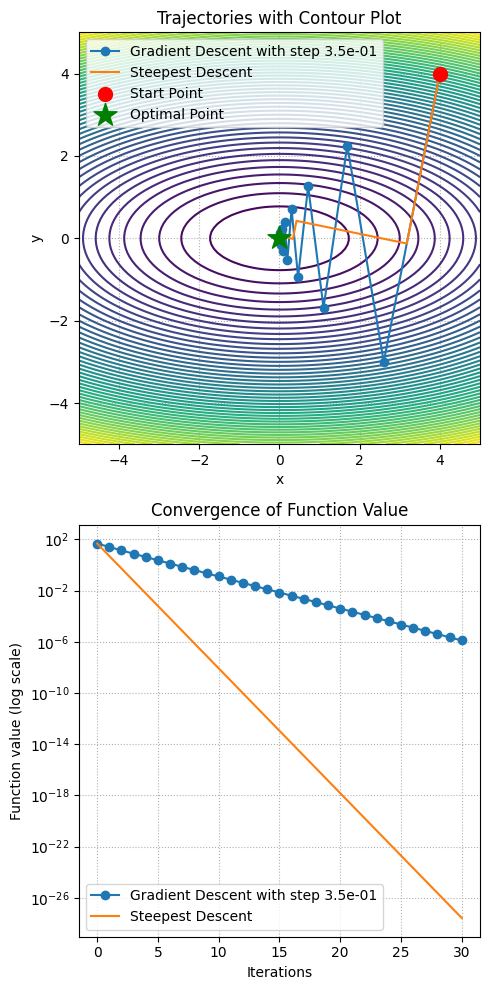

In [15]:
from jax import value_and_grad

import numpy as np
import matplotlib.pyplot as plt
from diffrax import diffeqsolve, Dopri5, ODETerm, SaveAt, PIDController
import jax.numpy as jnp
from jax import grad

# Quadratic function setup
# Corrected Quadratic function setup
A = jnp.array([[1., 0], [0, 5.]])  # Using jax.numpy for compatibility
quadratic_function = lambda x: 0.5 * jnp.dot(x, jnp.dot(A, x))  # Correct use of jnp.dot for matrix multiplication
grad_quadratic_function = grad(quadratic_function)  # Correct gradient computation

alpha = 0.35
num_steps = 30

# Plot contours function
def plot_contours(function, x_range, y_range, resolution=100):
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)  # Initialize Z with the correct shape
    
    # Compute the function value for each point on the grid
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = function(np.array([X[i, j], Y[i, j]]))
    
    plt.contour(X, Y, Z, levels=50, cmap='viridis')


# Gradient Descent Method
def gradient_descent(grad_func, start_point, learning_rate=0.1, num_steps=50):
    trajectory = [start_point]
    x = start_point
    for _ in range(num_steps):
        grad = grad_func(x)
        x = x - learning_rate * grad
        trajectory.append(x)
    return np.array(trajectory)


# Steepest Descent Method with Line Search
# Steepest Descent Method with Exact Line Search for Quadratic Functions
# Corrected Steepest Descent Method with Exact Line Search for Quadratic Functions
def steepest_descent_exact_line_search(grad_func, start_point, A, num_steps=50):
    trajectory = [start_point]
    x = start_point
    for _ in range(num_steps):
        grad = grad_func(x)
        alpha = jnp.dot(grad, grad) / jnp.dot(grad, jnp.dot(A, grad))  # Corrected to use jnp for JAX compatibility
        x = x - alpha * grad
        trajectory.append(x)
    return jnp.array(trajectory)  # Use jnp.array to ensure compatibility



# Setup
start_point = jnp.array([4.0, 4.0])

# Solve trajectories
trajectory_gd = gradient_descent(grad_quadratic_function, start_point, alpha, num_steps)
trajectory_sd = steepest_descent_exact_line_search(grad_quadratic_function, start_point, A, num_steps)


# Plotting
plt.figure(figsize=(5, 10))

# Left subplot for contour and trajectories
plt.subplot(2, 1, 1)
plot_contours(quadratic_function, x_range=(-5, 5), y_range=(-5, 5))
plt.plot(trajectory_gd[:, 0], trajectory_gd[:, 1], 'o-',  label=f'Gradient Descent with step {alpha:.1e}')
plt.plot(trajectory_sd[:, 0], trajectory_sd[:, 1], '-', label='Steepest Descent')
plt.scatter(*start_point, color='red', marker='o', s=100, zorder=5, label='Start Point')
plt.scatter(0, 0, color='green', marker='*', s=300, zorder=5, label='Optimal Point')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectories with Contour Plot')
plt.legend()
plt.grid(linestyle=":")

# Right subplot for semilogy convergence
plt.subplot(2, 1, 2)
function_values_gd = [quadratic_function(x) for x in trajectory_gd]
function_values_gf = [quadratic_function(x) for x in trajectory_sd]
plt.semilogy(function_values_gd, 'o-', label=f'Gradient Descent with step {alpha:.1e}')
plt.semilogy(function_values_gf, '-', label='Steepest Descent')
plt.xlabel('Iterations')
plt.ylabel('Function value (log scale)')
plt.title('Convergence of Function Value')
plt.grid(linestyle=":")
plt.legend()

plt.tight_layout()
plt.savefig("GD_vs_Steepest.pdf")
plt.show()

